<img src = "https://images2.imgbox.com/c1/79/4H1V1tSO_o.png" width="1200">

# Importação das bibliotecas que serão utilizados

In [1]:
import pandas as pd
import statistics
import math
import numpy as np
import seaborn as sns

# Leitura do banco de dados
O banco consiste em dados fornecidos pelo Airbnb referentes a locações na cidade de Berlim, na Alemanha.

In [2]:
df = pd.read_csv("http://data.insideairbnb.com/germany/be/berlin/2021-09-21/visualisations/listings.csv")

# Visualização do banco de dados

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,77,90,143,2021-07-22,2.15,5,326,10,NaN
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.12,1,93,1,NaN
2,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54301,13.41534,Private room,33,1,293,2019-12-11,2.40,1,0,0,NaN
3,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180,6,8,2020-01-04,0.16,1,0,0,03/Z/RA/003410-18
4,14325,Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70,90,26,2013-02-01,0.26,3,102,1,NaN


# Dicionário das variáveis
* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

# Análise descritiva

## Cálculo da média dos preços

In [4]:
df['price'].mean()

75.18963254593176

É o mesmo que:

In [5]:
df.price.mean()

75.18963254593176

## Cálculo da mediana dos preços

In [6]:
df['price'].median()

55.0

## Cálculo da moda dos preços

In [7]:
statistics.mode(df.price)

50

## Cálculo da amplitude dos preços

### Cálculo dos valores mínimo e máximo

In [8]:
df['price'].min()

0

In [9]:
df['price'].max()

8000

O valor mínimo de zero não parece ser um valor real. Então, vamos filtrar o banco de dados para excluir o valor zero e então calcular a amplitude:

In [10]:
df_filtered = df[df['price']>0]

In [11]:
df_filtered['price'].min()

8

In [12]:
amplitude = df_filtered['price'].max() - df_filtered['price'].min()
amplitude

7992

## Cálculo da variância dos preços

In [13]:
df.price.var()

15048.148212081367

## Cálculo do desvio-padrão dos preços

In [14]:
df.price.std()

122.67089390756622

Note que o desvio-padrão corresponde à raiz quadrada da variância:

In [15]:
math.sqrt(df.price.var())

122.67089390756622

# Cálculo dos percentis dos preços

Percentil 25% (equivalente ao quartil 1):

In [16]:
np.percentile(df.price, 25)

35.0

Cálculo de múltiplos percentis:

In [17]:
np.percentile(df.price, [25, 50, 75, 95])

array([ 35.,  55.,  85., 185.])

## Análise descritiva completa dos preços

In [18]:
df.price.describe()

count    18288.000000
mean        75.189633
std        122.670894
min          0.000000
25%         35.000000
50%         55.000000
75%         85.000000
max       8000.000000
Name: price, dtype: float64

## Análise descritiva completa de todas as variáveis numéricas do banco

In [19]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.828800e+04,1.828800e+04,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000,14716.000000,18288.000000,18288.000000,18288.000000
mean,2.557156e+07,9.337946e+07,52.509968,13.405091,75.189633,9.324256,22.789042,0.815542,3.025153,85.560860,2.679899
std,1.540011e+07,1.083088e+08,0.032444,0.063322,122.670894,34.238860,51.019422,1.577983,7.454440,124.507031,9.356743
min,2.015000e+03,1.581000e+03,52.340070,13.097150,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.218794e+07,1.194556e+07,52.489530,13.367973,35.000000,2.000000,1.000000,0.090000,1.000000,0.000000,0.000000
50%,2.385470e+07,4.352120e+07,52.509740,13.414855,55.000000,3.000000,4.000000,0.300000,1.000000,0.000000,0.000000
75%,3.968697e+07,1.449065e+08,52.533253,13.439183,85.000000,5.000000,17.000000,1.000000,2.000000,162.000000,2.000000
max,5.238006e+07,4.238179e+08,52.656110,13.757360,8000.000000,1124.000000,655.000000,90.860000,76.000000,365.000000,447.000000


Cuidado para não tratar variáveis como `id` e `host_id` como numéricas. Elas não representam quantidades, são apenas para identificação. Não faz sentido pensar em média, desvio-padrão para elas...

# Visualização gráfica

## Boxplot dos preços

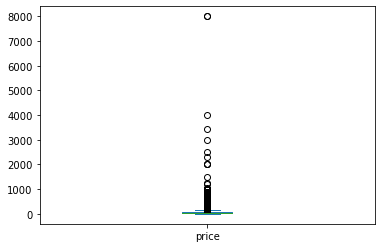

In [20]:
df.price.plot(kind = "box");

Ou, usando a biblioteca `seaborn`:

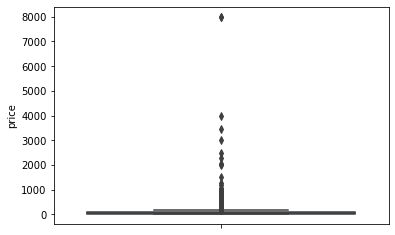

In [21]:
sns.boxplot(data=df, y='price');

Como há muitos outliers, com valores em altos, fica difícil visualizar a distribuição dos dados. Uma alternativa é modificar os limites do eixo y:

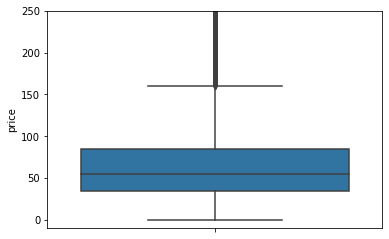

In [22]:
ax = sns.boxplot(data=df, y='price')
ax.set(ylim=(-10, 250));

Outra alternativa seria plotar os dados excluindo determinados valores. No exemplo abaixo, excluí os dados com preços acima de 185.

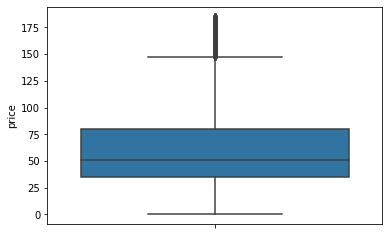

In [23]:
sns.boxplot(data=df[df.price <= 185], y='price');

## Histograma dos preços

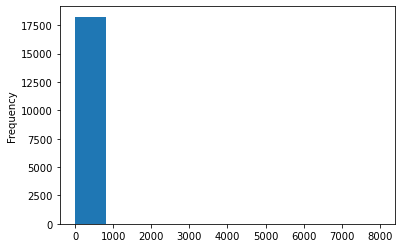

In [24]:
df.price.plot(kind = "hist");

Ou, usando a biblioteca `seaborn`:

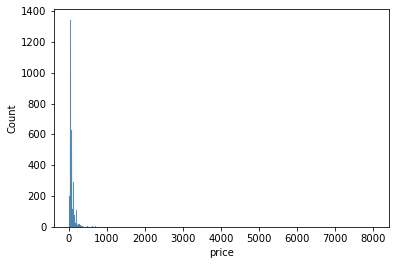

In [25]:
sns.histplot(data=df, x='price');

Como a distribuição é muito assimétrica, fica difícil visualizar a distribuição dos dados. Vale a pena plotar um histograma sem os valores mais altos. Vamos plotar sem os preços acima de 200:

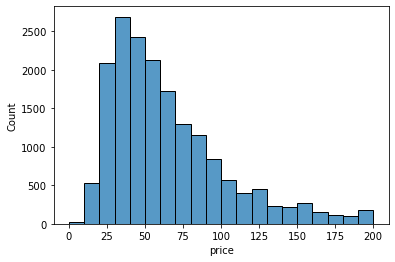

In [26]:
sns.histplot(data=df[df.price <= 200], x='price', binwidth=10);
# o binwidth estabelece que queremos que as barras seja definidas por intervalos de $10

## Gráfico de densidade dos preços

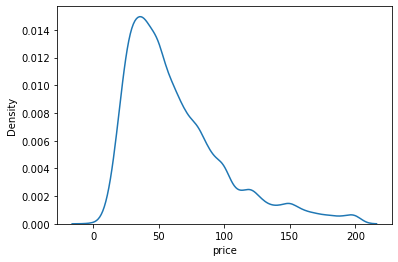

In [27]:
sns.kdeplot(data=df[df.price <= 200], x='price');

# Análise descritiva por grupo

Vamos agora repetir as análises de preço, mas por tipo de acomodação.

## Estatísticas descritivas

In [28]:
df.groupby('room_type').price.describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,10373.0,93.878627,95.266111,9.0,52.0,74.0,103.0,3455.0
Hotel room,165.0,191.854545,231.326431,0.0,104.0,145.0,204.0,2025.0
Private room,7533.0,47.851454,145.709480,8.0,27.0,35.0,50.0,8000.0
Shared room,217.0,42.138249,53.895383,9.0,20.0,27.0,40.0,500.0


Podemos perceber que as acomodações do tipo "casa ou apartamento inteiro" são as mais frequentes no app, em Berlim. E, que as acomodações com média e mediana de preço mais elevados são os quartos de hotel.

## Análise gráfica

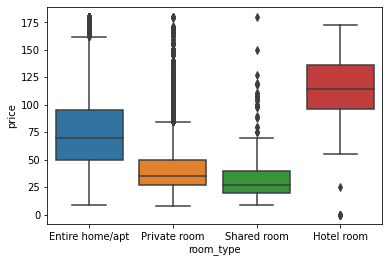

In [29]:
sns.boxplot(data=df[df.price <= 180], y='price', x='room_type');

O boxplot facilita a visualização das estatísticas descritivas. É possível observar que os preços de quartos de hotel tendem a ser mais altos que os das demais acomodações.

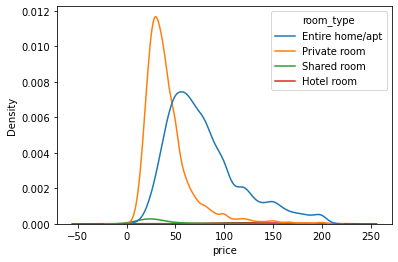

In [30]:
sns.kdeplot(data=df[df.price <= 200], x='price', hue='room_type');

# Gráficos para visualizar a relação entre duas variáveis numéricas

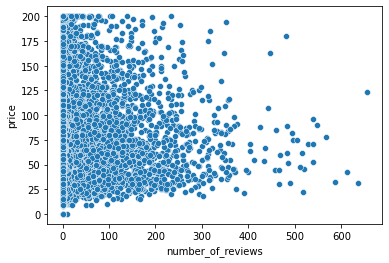

In [31]:
sns.scatterplot(data=df[df.price <= 200],y='price',x='number_of_reviews');

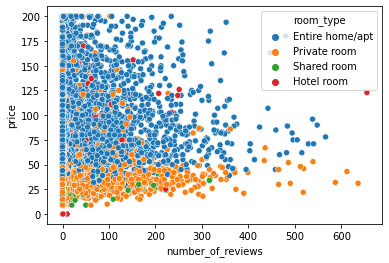

In [32]:
sns.scatterplot(data=df[df.price <= 200],y='price',x='number_of_reviews', hue='room_type');

Não parece haver uma relação entre o preço de uma acomodação e a quantidade de reviews que ela recebe.